In [65]:
import pickle
from glob import glob

In [15]:
import numpy as np

In [36]:
from PIL import Image

In [3]:
with open('/home/devyhia/FaceDetection_CNN/result.pickle') as f: result = pickle.load(f)

In [34]:
box = result.values()[100][0]

In [90]:
img_url = result.keys()[100]

In [91]:
img_url

'/home/devyhia/distracted.driver/Drive Safe/1084.jpg\n'

In [92]:
img = Image.open(img_url[:-1])

IOError: [Errno 2] No such file or directory: '/home/devyhia/distracted.driver/Drive Safe/1084.jpg'

In [31]:
x0 = int(np.floor(box[0]))
y0 = int(np.floor(box[1]))
x1 = int(np.ceil(box[2]))
y1 = int(np.ceil(box[3]))

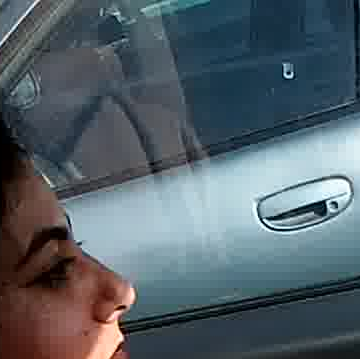

In [42]:
img.crop((x0, y0, x1, y1))

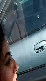

In [43]:
img.resize((244,244)).crop((x0*244/1920, y0*244/1080, x1*244/1920, y1*244/1080))

In [86]:
mask = np.zeros((1080, 1920, 3))

In [87]:
mask[y0:y1, x0:x1, :] = 1

In [72]:
trans = Image.new('RGBA', (720, 404))

In [75]:
np.where(mask[:,:, np.newaxis].astype(np.uint8), img, np.zeros(img.shape+(3,))).astype(np.uint8)

AttributeError: shape

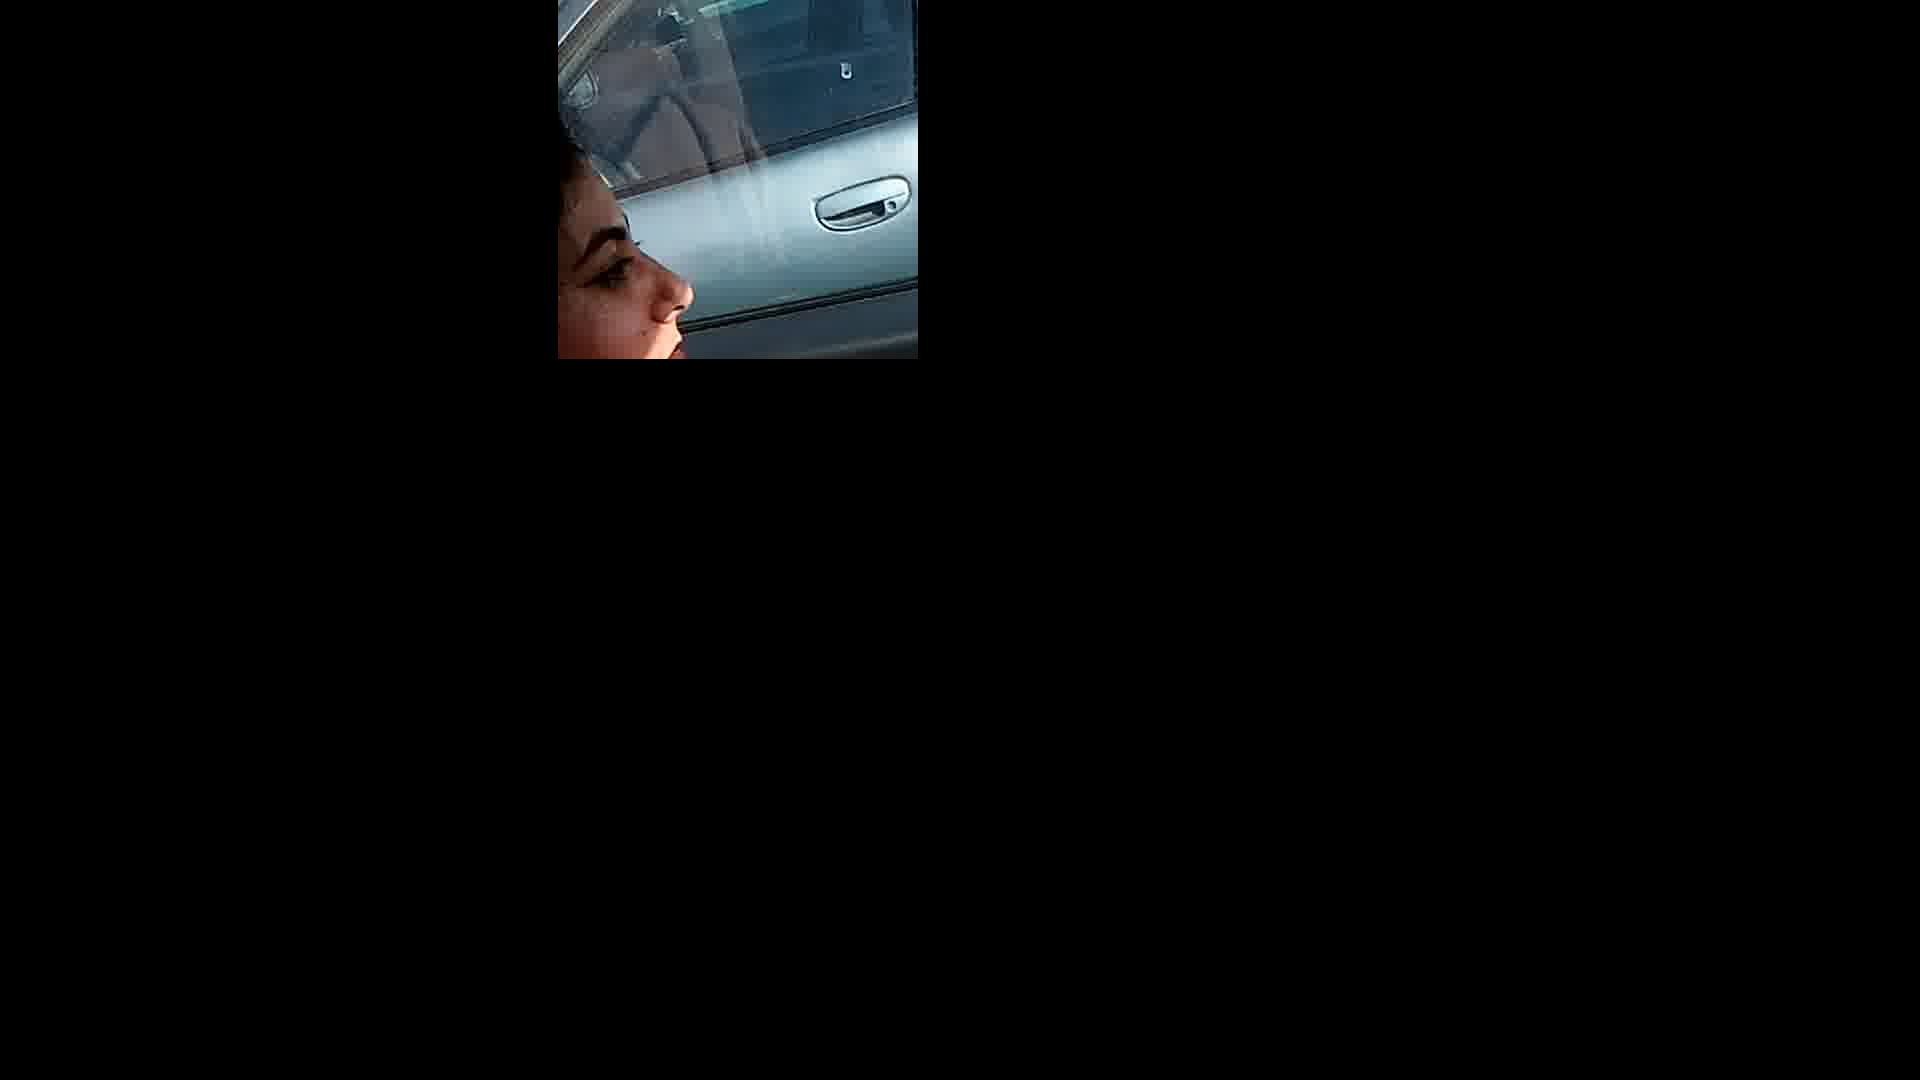

In [89]:
Image.fromarray(mask.astype(np.uint8) * img)

In [93]:
orig = glob('/home/devyhia/distracted.driver/*/*.original.jpg')

In [98]:
face = glob('/home/devyhia/distracted.driver/*/*.face.jpg')

In [157]:
seg = glob('/home/devyhia/distracted.driver/*/*.segmented.jpg')

In [160]:
len(seg) == len(face)

True

In [104]:
import random

In [106]:
div = random.sample(orig, len(orig))

In [109]:
train = div[:int(len(orig)*0.75)]

In [110]:
test = div[int(len(orig)*0.75):]

In [119]:
with open('/home/devyhia/distracted.driver/train.txt', 'w') as f:
    for l in train:
        f.writelines(l.replace('.original.jpg', '.jpg\n'))

In [120]:
with open('/home/devyhia/distracted.driver/test.txt', 'w') as f:
    for l in test:
        f.writelines(l.replace('.original.jpg', '.jpg\n'))

In [121]:
CLASSES = [
    "Drive Safe",
    "Text Left",
    "Talk Left",
    "Text Right",
    "Talk Right",
    "Adjust Radio",
    "Drink",
    "Hair & Makeup",
    "Reach Behind",
    "Talk Passenger"
]

In [125]:
DIR = '/home/devyhia/distracted.driver/'
SPLIT = 0.75

# Load Files Data
Data = {}
for idx, klass in enumerate(CLASSES):
    files = glob("{}{}/*.{}.jpg".format(DIR, klass, 'original'))
    Data[klass] = {
        "id": idx,
        "count": len(files),
        "files": files
    }

# Split Files Data into training and testing
train_images = []
test_images = []
train_labels = []
test_labels = []
for klass in CLASSES:
    files = Data[klass]['files']
    klass_id = Data[klass]['id']
    np.random.shuffle(files)
    THRES = int(SPLIT * len(files))
    train_images += files[:THRES]
    test_images += files[THRES:]
    train_labels += len(files[:THRES]) * [ klass_id ]
    test_labels += len(files[THRES:]) * [ klass_id ]

train_count = len(train_images)
test_count = len(test_images)

In [139]:
df = pd.DataFrame(zip(map(lambda x: x.replace('.original.jpg', '.jpg'), test_images), test_labels), columns=['Image', 'Label'])
df.to_csv('/home/devyhia/distracted.driver/test.csv', index=False)

In [130]:
import pandas as pd

In [142]:
dfTest = pd.read_csv('/home/devyhia/distracted.driver/test.csv')

In [155]:
dfTest.Image.count()

4331

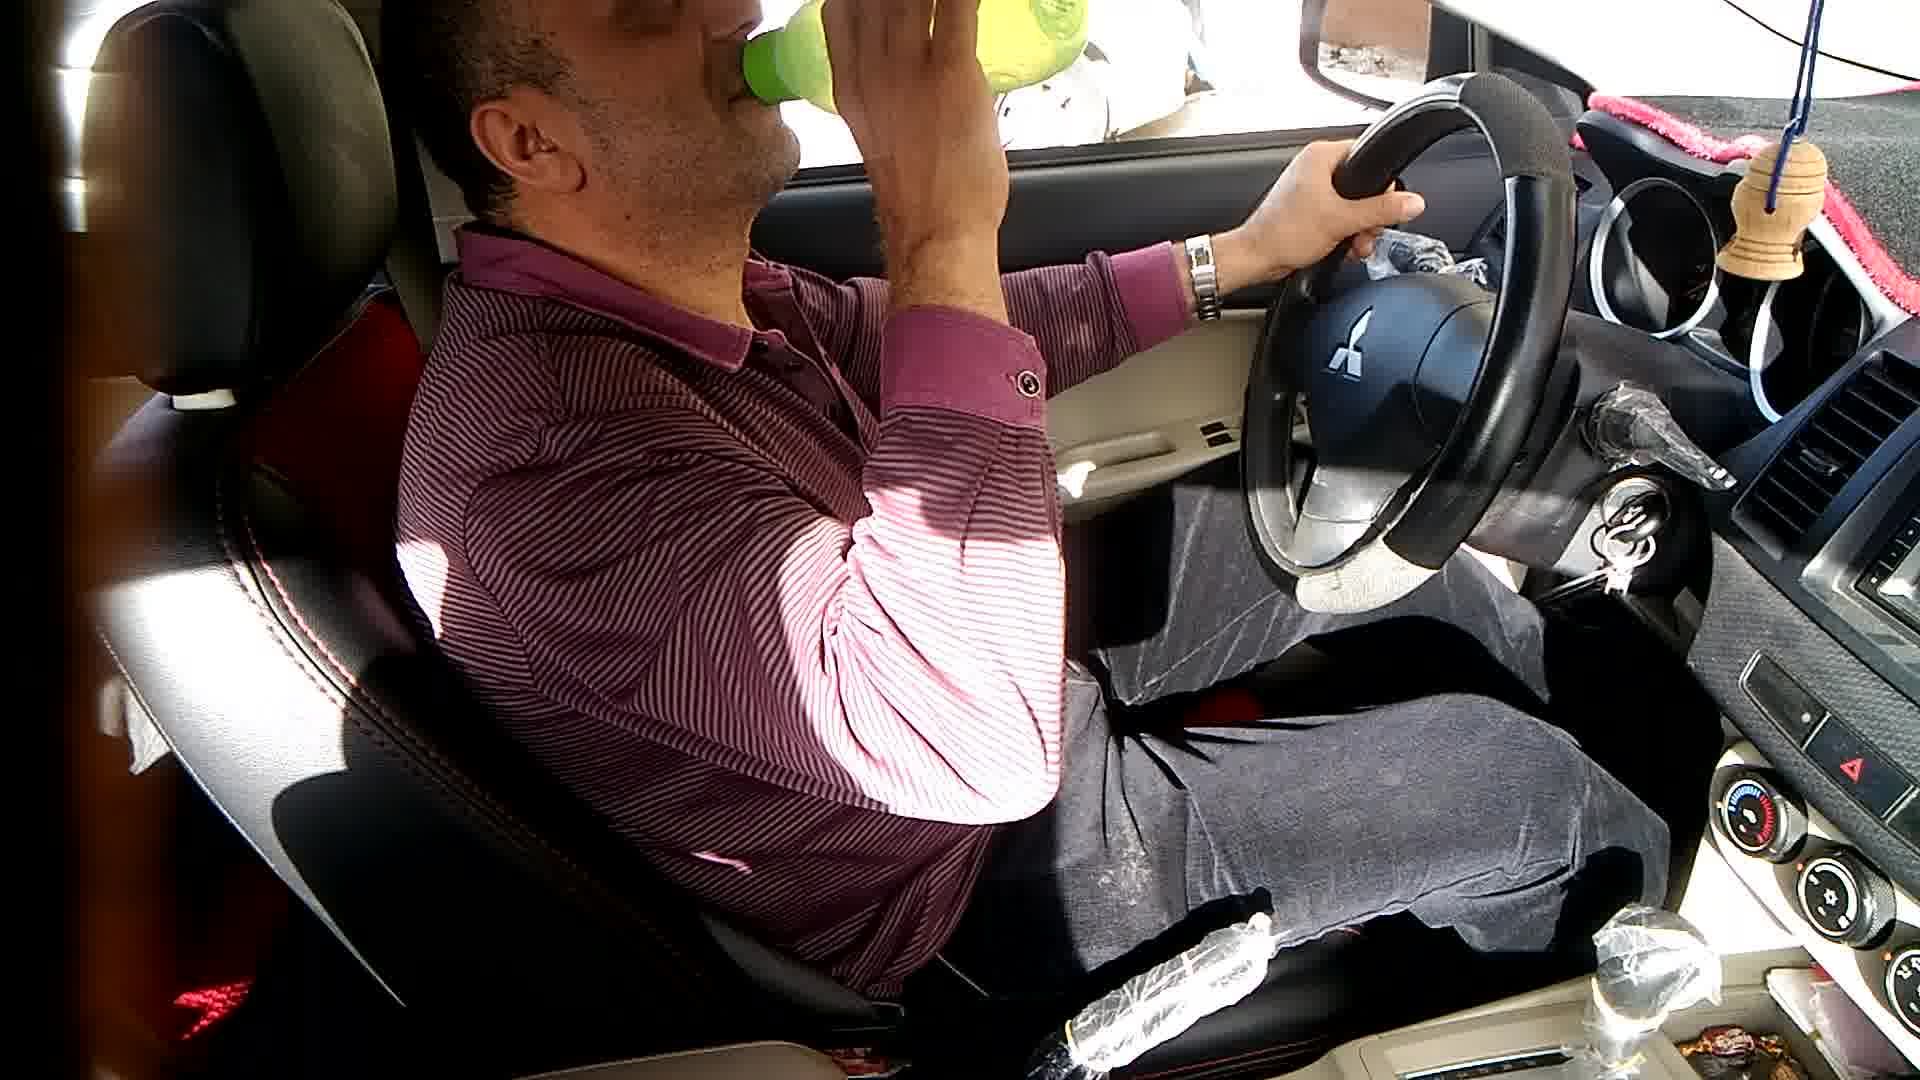

In [162]:
Image.open('/home/devyhia/distracted.driver/Drink/100.original.jpg')